# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SPUDS_cat=Table.read('./data/SPUDS/dmu26_XID+SPIRE_XMM-LSS_SPUDS_cat.fits')
SWIRE_cat=Table.read('./data/SWIRE/dmu26_XID+SPIRE_XMM-LSS_SWIRE_cat.fits')


In [3]:
SWIRE_cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J021843.070-062345.559,34.6794586722776,-6.39598871477323,28.106323,31.787186,24.320782,14.86585,18.867529,10.946693,18.77406,23.554134,14.060136,-0.6687285,-0.36958015,0.39386123,4.6595383,5.316101,4.7404494,1.00019,0.9990352,0.99990386,2000.0,2000.0,2000.0,0.297,0.378,0.118
HELP_J021846.087-062301.346,34.692030947564795,-6.383707158297614,7.2057586,10.600523,3.6738095,12.404731,16.126064,8.807028,19.111168,23.104948,15.155273,-0.6687285,-0.36958015,0.39386123,4.6595383,5.316101,4.7404494,0.9984855,1.0011853,0.9995405,2000.0,2000.0,2000.0,0.406,0.901,0.113
HELP_J021852.610-062138.457,34.7192093322776,-6.36068236477323,2.7928305,5.4414535,0.79629254,5.266934,8.781374,2.253929,4.748821,8.556924,1.7911544,-0.6687285,-0.36958015,0.39386123,4.6595383,5.316101,4.7404494,0.99894994,0.998441,0.99914604,2000.0,2000.0,2000.0,0.384,0.273,0.004
HELP_J021854.601-062151.326,34.7275025122776,-6.36425716477323,13.22103,17.279284,9.081699,9.145302,13.283591,5.167476,2.1673646,5.007581,0.6231815,-0.6687285,-0.36958015,0.39386123,4.6595383,5.316101,4.7404494,0.9987453,0.99862784,0.99979943,2000.0,2000.0,2000.0,0.483,0.608,0.017
HELP_J021902.964-062107.389,34.7623517522776,-6.35205237477323,12.337679,15.817794,8.95833,5.071492,8.535666,2.1186075,3.8037868,7.26709,1.1349028,-0.9315625,-0.7537224,1.3359311,5.1656833,6.2448225,6.108922,1.001131,0.99954456,1.0028404,1727.0,2000.0,2000.0,0.079,0.338,0.168
HELP_J021904.121-062045.966,34.7671723022776,-6.34610168477323,2.6281958,5.1510525,0.84487414,1.1193324,2.8764668,0.2826115,1.5019509,3.3110747,0.39538592,-0.9315625,-0.7537224,1.3359311,5.1656833,6.2448225,6.108922,0.9994667,0.99969625,0.99921954,2000.0,2000.0,2000.0,0.012,0.456,0.119
HELP_J021905.431-062024.484,34.7726311822776,-6.34013435477323,3.3464177,6.2835426,1.1288706,3.0224488,5.916044,1.0060625,2.0716078,4.45178,0.5721242,-0.9315625,-0.7537224,1.3359311,5.1656833,6.2448225,6.108922,0.99841726,0.9987314,0.99939454,2000.0,2000.0,2000.0,0.012,0.549,0.21
HELP_J021909.121-062049.759,34.7880059475648,-6.347155158297614,0.6009758,1.7317867,0.15398516,1.1690608,2.75156,0.2963565,1.7167475,3.874295,0.4943383,-0.9315625,-0.7537224,1.3359311,5.1656833,6.2448225,6.108922,0.99880785,0.9983598,0.99871695,2000.0,2000.0,2000.0,0.422,0.812,0.289


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


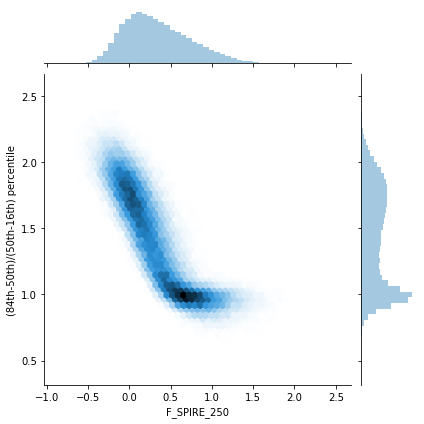

In [4]:
skew=(SPUDS_cat['FErr_SPIRE_250_u']-SPUDS_cat['F_SPIRE_250'])/(SPUDS_cat['F_SPIRE_250']-SPUDS_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SPUDS_cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 4mJy

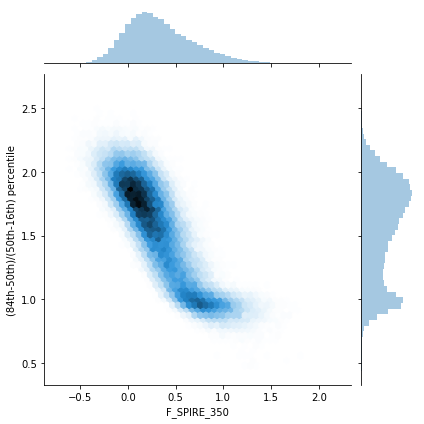

In [5]:
skew=(SPUDS_cat['FErr_SPIRE_350_u']-SPUDS_cat['F_SPIRE_350'])/(SPUDS_cat['F_SPIRE_350']-SPUDS_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SPUDS_cat['F_SPIRE_350']),y=skew, kind='hex')

For 350 $\mathrm{\mu m}$ depth is ~ 4mJy

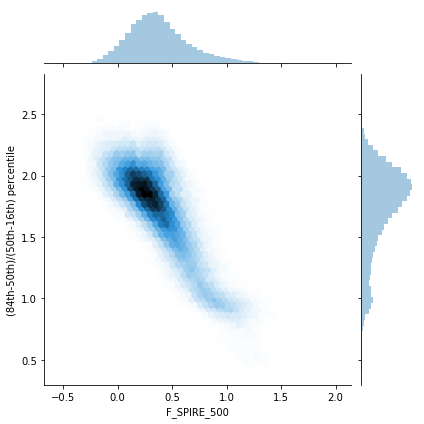

In [6]:
skew=(SPUDS_cat['FErr_SPIRE_500_u']-SPUDS_cat['F_SPIRE_500'])/(SPUDS_cat['F_SPIRE_500']-SPUDS_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SPUDS_cat['F_SPIRE_500']),y=skew, kind='hex')

For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

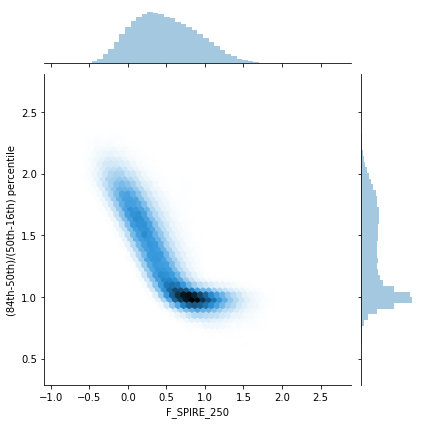

In [7]:
skew=(SWIRE_cat['FErr_SPIRE_250_u']-SWIRE_cat['F_SPIRE_250'])/(SWIRE_cat['F_SPIRE_250']-SWIRE_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_250']),y=skew, kind='hex')

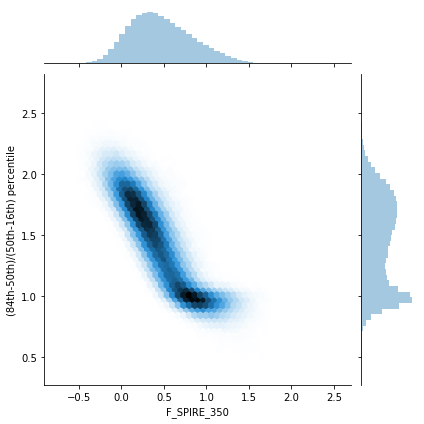

In [8]:
skew=(SWIRE_cat['FErr_SPIRE_350_u']-SWIRE_cat['F_SPIRE_350'])/(SWIRE_cat['F_SPIRE_350']-SWIRE_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_350']),y=skew, kind='hex')

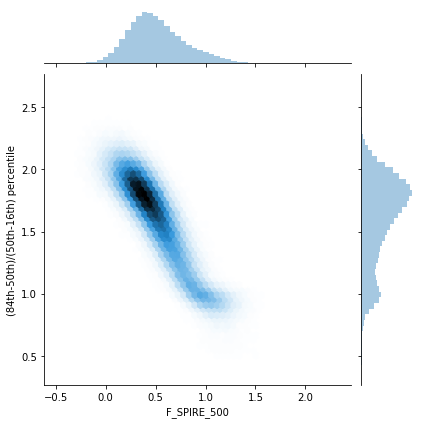

In [9]:
skew=(SWIRE_cat['FErr_SPIRE_500_u']-SWIRE_cat['F_SPIRE_500'])/(SWIRE_cat['F_SPIRE_500']-SWIRE_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [10]:
from astropy.table import Column
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_spire_250'))
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_spire_350'))
SPUDS_cat.add_column(Column(np.zeros(len(SPUDS_cat), dtype=bool),name='flag_spire_500'))



In [11]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_250'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_350'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_500'))

In [12]:
ind_SPUDS_250=(SPUDS_cat['Pval_res_250']>0.5) | (SPUDS_cat['F_SPIRE_250'] < 4)
ind_SPUDS_350=(SPUDS_cat['Pval_res_350']>0.5) | (SPUDS_cat['F_SPIRE_350'] < 4)
ind_SPUDS_500=(SPUDS_cat['Pval_res_500']>0.5) | (SPUDS_cat['F_SPIRE_500'] < 4)


In [13]:
ind_SWIRE_250=(SWIRE_cat['Pval_res_250']>0.5) | (SWIRE_cat['F_SPIRE_250'] < 4)
ind_SWIRE_350=(SWIRE_cat['Pval_res_350']>0.5) | (SWIRE_cat['F_SPIRE_350'] < 4)
ind_SWIRE_500=(SWIRE_cat['Pval_res_500']>0.5) | (SWIRE_cat['F_SPIRE_500'] < 4)


In [14]:
print(ind_SPUDS_250.sum(),ind_SPUDS_350.sum(),ind_SPUDS_500.sum(),len(SPUDS_cat))

56317 59219 61122 73011


In [15]:
print(ind_SWIRE_250.sum(),ind_SWIRE_350.sum(),ind_SWIRE_500.sum(),len(SWIRE_cat))

185277 194769 192371 287599


In [16]:
SPUDS_cat['flag_spire_250'][ind_SPUDS_250]=True
SPUDS_cat['flag_spire_350'][ind_SPUDS_350]=True
SPUDS_cat['flag_spire_500'][ind_SPUDS_500]=True


In [17]:
SWIRE_cat['flag_spire_250'][ind_SWIRE_250]=True
SWIRE_cat['flag_spire_350'][ind_SWIRE_350]=True
SWIRE_cat['flag_spire_500'][ind_SWIRE_500]=True

In [18]:
SPUDS_cat.write('./data/SPUDS/dmu26_XID+SPIRE_XMM-LSS_SPUDS_cat_20190107.fits', format='fits',overwrite=True)


In [19]:
SWIRE_cat.write('./data/SWIRE/dmu26_XID+SPIRE_XMM-LSS_SWIRE_cat_20190107.fits', format='fits',overwrite=True)


In [20]:
ind_good=SPUDS_cat['flag_spire_250'] | SPUDS_cat['flag_spire_350'] | SPUDS_cat['flag_spire_500']

In [21]:
np.invert(ind_good).sum()

5185

In [22]:
SPUDS_cat[np.invert(ind_good)][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J021802.084-055728.441,34.5086839475648,-5.957900158297615,12.201275,15.036644,9.359589,15.099216,18.714537,10.997176,6.7461343,11.785031,2.3683076,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0002649,1.000339,0.99917126,2000.0,1437.0,1479.0,0.006,0.065,0.178,False,False,False
HELP_J021757.207-055811.262,34.4883625922776,-5.96979486477323,17.119503,20.2114,14.112657,21.529835,25.422842,17.53833,18.019526,22.275217,13.5065155,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,0.99915767,1.0002244,0.99989885,2000.0,2000.0,2000.0,0.0,0.016,0.13,False,False,False
HELP_J021803.778-055657.415,34.5157423722776,-5.949281904773231,9.5441675,13.662085,5.1787667,11.497858,14.886159,7.279724,8.705358,13.081042,4.1485653,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0035851,1.000889,0.99911535,1384.0,2000.0,967.0,0.001,0.054,0.118,False,False,False
HELP_J021833.324-055421.939,34.6388499475648,-5.9060941582976145,5.900564,7.972358,3.8850882,4.4867787,6.4631033,2.285395,8.90624,11.279657,6.2524915,-4.747228,-6.4746065,-9.145537,2.1431887,2.5644584,2.5957031,1.0001363,1.0001447,0.99970275,2000.0,2000.0,2000.0,0.003,0.095,0.213,False,False,False
HELP_J021842.263-055334.027,34.6760959475648,-5.892785158297615,17.303387,19.167015,15.505706,23.520311,25.42235,21.41901,12.041135,14.968963,9.072927,-4.747228,-6.4746065,-9.145537,2.1431887,2.5644584,2.5957031,1.0009319,1.000164,0.99858093,2000.0,2000.0,2000.0,0.031,0.071,0.004,False,False,False
HELP_J021820.961-055540.794,34.5873366722776,-5.92799843477323,14.036406,15.883743,12.244733,10.052323,11.949116,8.129976,4.00178,6.246226,1.9659113,-4.747228,-6.4746065,-9.145537,2.1431887,2.5644584,2.5957031,0.99894047,0.9988275,0.9993639,2000.0,2000.0,2000.0,0.006,0.197,0.003,False,False,False
HELP_J021827.769-055407.979,34.6157034422776,-5.90221631477323,23.855402,25.916903,21.903347,18.669052,20.729773,16.429546,8.481572,12.114082,4.439928,-4.747228,-6.4746065,-9.145537,2.1431887,2.5644584,2.5957031,1.000685,0.9987158,1.0038031,2000.0,2000.0,2000.0,0.363,0.182,0.002,False,False,False
HELP_J021814.879-055319.726,34.5619978522776,-5.88881279477323,16.940998,19.062202,14.7370615,20.705166,22.726488,18.537647,18.960814,21.572128,15.932388,-4.747228,-6.4746065,-9.145537,2.1431887,2.5644584,2.5957031,1.0004164,1.0000703,0.99938124,2000.0,2000.0,2000.0,0.023,0.007,0.0,False,False,False


In [23]:
SPUDS_cat[ind_good][0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J021748.384-055853.332,34.4515999475648,-5.9814811582976155,16.661362,19.357668,13.724435,14.188297,17.57091,11.240944,2.3797045,5.190917,0.65324414,-1.2221587,-2.6682324,-1.689631,3.4482386,4.622707,4.8064504,0.99898946,0.99842364,0.999194,2000.0,2000.0,2000.0,0.0,0.009,0.009,False,False,True
HELP_J021747.552-055909.435,34.4481319475648,-5.985954158297615,1.3507836,3.1066031,0.37128547,1.3343723,3.3080966,0.34537223,1.9655688,4.617843,0.5736374,-1.2221587,-2.6682324,-1.689631,3.4482386,4.622707,4.8064504,0.99967396,0.9982921,0.9991658,2000.0,2000.0,2000.0,0.006,0.012,0.041,True,True,True
HELP_J021751.319-055843.666,34.4638289475648,-5.978796158297614,4.0543675,6.7232165,1.5576985,2.9445827,5.923258,1.041339,3.7527492,7.2984576,1.1844742,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0004258,1.0041645,0.9998767,2000.0,2000.0,2000.0,0.061,0.073,0.112,False,True,True
HELP_J021751.808-055827.121,34.465864947564796,-5.974200158297615,2.2544196,4.6754804,0.6780018,1.8389217,4.3477798,0.4866936,1.4390124,3.549971,0.3836975,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0024376,0.9995011,0.99921066,2000.0,2000.0,2000.0,0.0,0.095,0.028,True,True,True
HELP_J021752.105-055836.873,34.4671040222776,-5.97690909477323,11.408123,14.426342,8.3519745,5.15811,8.539478,2.0814307,3.8819952,7.672657,1.3938935,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0014277,1.0016568,0.99972767,1207.0,2000.0,2000.0,0.35,0.123,0.085,False,False,True
HELP_J021756.415-055812.803,34.4850609475648,-5.970223158297616,17.04454,20.484087,13.637192,9.649507,14.550401,4.7066703,2.1882393,5.327879,0.5851868,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,0.99849164,1.0027438,1.0001165,2000.0,2000.0,1129.0,0.001,0.013,0.227,False,False,True
HELP_J021755.590-055800.544,34.4816249822776,-5.96681790477323,7.105362,9.896318,4.2484193,3.3721666,6.576851,1.0747968,1.768045,4.5411625,0.43115795,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,0.9996203,0.9988209,0.99980897,2000.0,2000.0,2000.0,0.004,0.006,0.053,False,True,True
HELP_J021754.691-055807.994,34.4778793322776,-5.96888729477323,0.9339277,2.4209974,0.26127464,0.87774974,2.1647997,0.2342703,1.711126,4.0646815,0.48377928,-3.1474733,-4.917348,-6.5131936,2.8000314,3.5104077,4.3770723,1.0001823,0.99907446,0.9985437,2000.0,2000.0,2000.0,0.001,0.006,0.034,True,True,True
